<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bonus" data-toc-modified-id="Bonus-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bonus</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#🏁" data-toc-modified-id="🏁-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>🏁</a></span></li></ul></div>

# Bonus

Have fun with the `house.csv` dataset! 

Investigate the features and add them to your modelling to improve the performance 

⚠️ Don't forget to diagnose model performance along the way.

ℹ️ You can download a detailed description of the dataset [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt). Make sure to refer to it throughout the day.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [4]:
df = pd.read_csv("../data/houses.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 85 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1760 non-null   int64  
 1   MSSubClass     1760 non-null   int64  
 2   MSZoning       1760 non-null   object 
 3   LotFrontage    1451 non-null   float64
 4   LotArea        1760 non-null   int64  
 5   Street         1760 non-null   object 
 6   Alley          112 non-null    object 
 7   LotShape       1760 non-null   object 
 8   LandContour    1760 non-null   object 
 9   Utilities      1760 non-null   object 
 10  LotConfig      1760 non-null   object 
 11  LandSlope      1760 non-null   object 
 12  Neighborhood   1760 non-null   object 
 13  Condition1     1760 non-null   object 
 14  Condition2     1760 non-null   object 
 15  BldgType       1760 non-null   object 
 16  HouseStyle     1760 non-null   object 
 17  OverallQual    1760 non-null   int64  
 18  OverallC

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,Pesos,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1760.000000,1760.000000,1451.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1751.000000,1.747000e+03,...,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000
mean,727.141477,57.210227,70.461751,10536.740341,6.107955,5.572159,1971.317614,1984.630682,104.973729,3.631104e+06,...,94.631250,46.959659,22.942614,3.203977,14.931250,2.888636,44.123864,6.336932,2007.815341,182289.685227
std,422.491995,42.231005,24.782149,9449.032214,1.399157,1.114491,30.110328,20.643127,185.951218,1.628917e+06,...,124.720977,66.583959,62.179348,28.329758,55.620643,40.699848,495.619906,2.700009,1.334159,82143.250734
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,6.980000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,358.000000,20.000000,59.500000,7587.250000,5.000000,5.000000,1954.000000,1966.750000,0.000000,2.598000e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,726.500000,50.000000,70.000000,9525.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,3.260000e+06,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163500.000000
75%,1095.250000,70.000000,80.000000,11665.500000,7.000000,6.000000,2000.000000,2004.000000,165.500000,4.280000e+06,...,168.000000,69.250000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214925.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,1.510000e+07,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


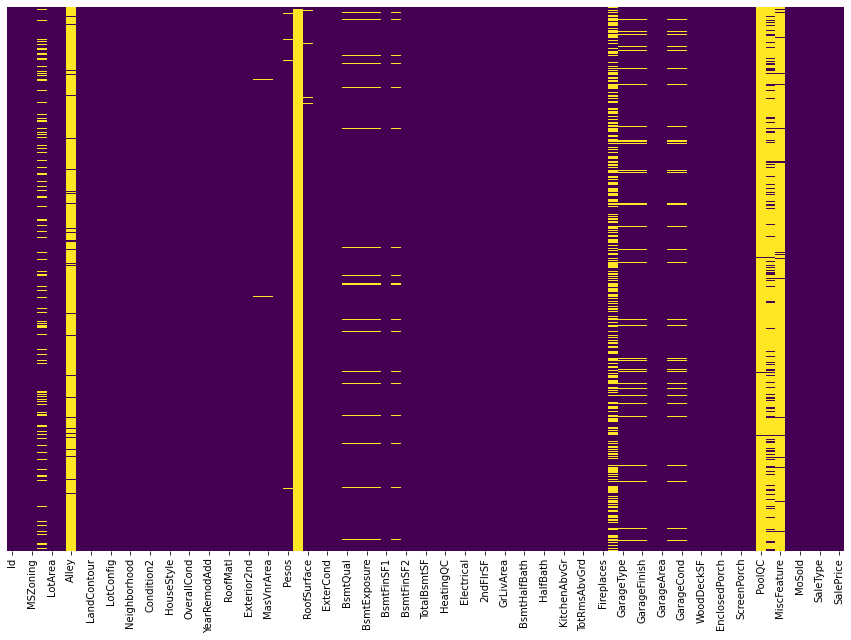

In [25]:
#check for missing values
# Yellow = NAN value
plt.figure(figsize = (15,10))
sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis');

In [39]:
# drop all columns with null values
columns_drop = [index for index, count in df.isnull().sum().items() if count > 0]
df_clean = df.drop(columns_drop, axis=1)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1756,118,20,8536,5,5,2006,2007,0,0,1125,...,80,64,0,0,0,0,0,4,2007,155000
1757,253,60,8366,6,5,2004,2004,0,0,798,...,138,45,0,0,0,0,0,12,2008,173000
1758,199,75,5520,6,6,1912,1950,0,0,755,...,0,198,30,0,0,0,0,7,2009,104000


In [47]:
# seperate categorical and numerical variables
df_cat = df_clean.select_dtypes(exclude=["int", "float"])
df_num = df_clean.select_dtypes(include=["int", "float"])

# 🏁

In [ ]:
from too